**Download the dataset from kaggle**

https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated


In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d asaniczka/top-spotify-songs-in-73-countries-daily-updated

Dataset URL: https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated
License(s): ODC Attribution License (ODC-By)
 99% 87.0M/87.9M [00:04<00:00, 28.0MB/s]
100% 87.9M/87.9M [00:04<00:00, 21.2MB/s]


In [5]:
! unzip /content/top-spotify-songs-in-73-countries-daily-updated.zip

Archive:  /content/top-spotify-songs-in-73-countries-daily-updated.zip
  inflating: universal_top_spotify_songs.csv  


**Data Loading and Preprocessing**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/universal_top_spotify_songs.csv')
df.head(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,2,NaN,2024-08-28,93,False,...,6,-7.777,0,0.0304,0.308,0.000000,0.122,0.535,157.969,3
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,-1,NaN,2024-08-28,100,False,...,2,-10.171,1,0.0358,0.200,0.060800,0.117,0.438,104.978,4
2,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,3,0,4,NaN,2024-08-28,97,True,...,9,-6.073,1,0.0540,0.274,0.000000,0.104,0.579,107.071,4
3,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,4,0,0,NaN,2024-08-28,98,True,...,0,-5.478,1,0.0285,0.107,0.000065,0.185,0.690,103.969,4
4,5G2f63n7IPVPPjfNIGih7Q,Taste,Sabrina Carpenter,5,0,45,NaN,2024-08-28,85,False,...,3,-4.086,1,0.0640,0.101,0.000000,0.297,0.721,112.964,4


In [8]:
print (df.shape)
df.info()

(1139303, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139303 entries, 0 to 1139302
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1139303 non-null  object 
 1   name                1139276 non-null  object 
 2   artists             1139276 non-null  object 
 3   daily_rank          1139303 non-null  int64  
 4   daily_movement      1139303 non-null  int64  
 5   weekly_movement     1139303 non-null  int64  
 6   country             1123846 non-null  object 
 7   snapshot_date       1139303 non-null  object 
 8   popularity          1139303 non-null  int64  
 9   is_explicit         1139303 non-null  bool   
 10  duration_ms         1139303 non-null  int64  
 11  album_name          1138707 non-null  object 
 12  album_release_date  1138869 non-null  object 
 13  danceability        1139303 non-null  float64
 14  energy              1139303 non-null  float64
 15  k

In [9]:
df.isna().sum()

,0
spotify_id,0
name,27
artists,27
daily_rank,0
daily_movement,0
weekly_movement,0
country,15457
snapshot_date,0
popularity,0
is_explicit,0


In [10]:
print(df.columns)

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


In [11]:
df = df.dropna(subset = ['country', 'artists', 'name', 'album_name', 'album_release_date'])
df.isna().sum()

,0
spotify_id,0
name,0
artists,0
daily_rank,0
daily_movement,0
weekly_movement,0
country,0
snapshot_date,0
popularity,0
is_explicit,0


**Feature Engineering**

In [12]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days
df['is_explicit'] = df['is_explicit'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1123253 entries, 50 to 1139302
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   spotify_id          1123253 non-null  object        
 1   name                1123253 non-null  object        
 2   artists             1123253 non-null  object        
 3   daily_rank          1123253 non-null  int64         
 4   daily_movement      1123253 non-null  int64         
 5   weekly_movement     1123253 non-null  int64         
 6   country             1123253 non-null  object        
 7   snapshot_date       1123253 non-null  datetime64[ns]
 8   popularity          1123253 non-null  int64         
 9   is_explicit         1123253 non-null  category      
 10  duration_ms         1123253 non-null  int64         
 11  album_name          1123253 non-null  object        
 12  album_release_date  1123253 non-null  datetime64[ns]
 13  danceability    

In [13]:
df['release_year'] = df['album_release_date'].dt.year
df['release_month'] = df['album_release_date'].dt.month
df['release_day'] = df['album_release_date'].dt.day
df['snapshot_year'] = df['snapshot_date'].dt.year
df['snapshot_month'] = df['snapshot_date'].dt.month
df['snapshot_day'] = df['snapshot_date'].dt.day
df.sample(3)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,valence,tempo,time_signature,since_release,release_year,release_month,release_day,snapshot_year,snapshot_month,snapshot_day
309197,6g95dK7o7vVh8ZCnDAseU5,كلام عينيه,Sherine,48,0,-2,EG,2024-06-05,72,False,...,0.745,131.931,4,2051,2018,10,24,2024,6,5
802106,7vOmSP2647oNUGGEhWd1cr,Montagem Mysterious Game,LXNGVX,20,1,24,KZ,2024-01-18,79,False,...,0.222,130.051,4,48,2023,12,1,2024,1,18
53643,1iZOPk4TnPpL1NOqCXSoRv,Väärään aikaan (feat. HUGO),"AHTI, HUGO",44,0,-5,FI,2024-08-14,59,True,...,0.744,143.953,4,250,2023,12,8,2024,8,14


In [14]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence']

In [15]:
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False)

In [16]:
print(df['country'].unique())

['ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE' 'SA'
 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG' 'MY'
 'MX' 'MA' 'LV' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE' 'ID'
 'HU' 'HN' 'HK' 'GT' 'GR' 'GB' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DO' 'DK'
 'DE' 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT'
 'AR' 'AE']


In [18]:
iso = pd.read_excel('/content/country codes.xls')
iso.head(5)

,Code Value,Definition
0,AF,Afghanistan
1,AX,Aland Islands
2,AL,Albania
3,DZ,Algeria
4,AS,American Samoa


In [20]:
df = pd.merge(df, iso[['Code Value', 'Definition']], left_on='country', right_on='Code Value', how='left')
df.head(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,time_signature,since_release,release_year,release_month,release_day,snapshot_year,snapshot_month,snapshot_day,Code Value,Definition
0,0NLRYW9HyqHcbyzfAwskKN,Yebo Lapho (Gogo) (feat. DJ Maphorisa & Djy Biza),"Felo Le Tee, Scotts Maphuma, Thabza Tee, DJ Ma...",1,0,0,ZA,2024-08-28,66,False,...,4,56,2024,7,3,2024,8,28,ZA,South Africa
1,64e1w4LMyXcTLCFzR3xCRX,Mfazi Wephepha (feat. Big Zulu & Zee Nxumalo),"Wanitwa Mos, Nkosazana Daughter, Master KG, Bi...",2,0,3,ZA,2024-08-28,58,False,...,4,19,2024,8,9,2024,8,28,ZA,South Africa
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,0,-1,ZA,2024-08-28,100,False,...,4,103,2024,5,17,2024,8,28,ZA,South Africa
3,1gM44tVZ9pfUe9v35Stp31,Kwelanga 2.0 (feat. Tman Xpress & LeeMcKrazy),"Bassie, M-Touch, Ranger, Amaza, LeeMcKrazy, Tm...",4,0,0,ZA,2024-08-28,62,False,...,4,82,2024,6,7,2024,8,28,ZA,South Africa
4,21fhgH4tjYcAKzkzCuYyr6,Sdakiwe Sbali (feat. Bless The Gentleman & DJ ...,"Blaq Major, BLESS THE GENTLEMAN, DJ KAP",5,0,3,ZA,2024-08-28,54,False,...,4,16,2024,8,12,2024,8,28,ZA,South Africa


In [23]:
print (df['Definition'].unique().shape)

(72,)


In [24]:
df.rename(columns={'country': 'country_code', 'Definition': 'country_name'}, inplace=True)
df = df.drop('Code Value', axis=1)
df.head(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country_code,snapshot_date,popularity,is_explicit,...,tempo,time_signature,since_release,release_year,release_month,release_day,snapshot_year,snapshot_month,snapshot_day,country_name
0,0NLRYW9HyqHcbyzfAwskKN,Yebo Lapho (Gogo) (feat. DJ Maphorisa & Djy Biza),"Felo Le Tee, Scotts Maphuma, Thabza Tee, DJ Ma...",1,0,0,ZA,2024-08-28,66,False,...,113.000,4,56,2024,7,3,2024,8,28,South Africa
1,64e1w4LMyXcTLCFzR3xCRX,Mfazi Wephepha (feat. Big Zulu & Zee Nxumalo),"Wanitwa Mos, Nkosazana Daughter, Master KG, Bi...",2,0,3,ZA,2024-08-28,58,False,...,113.006,4,19,2024,8,9,2024,8,28,South Africa
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,0,-1,ZA,2024-08-28,100,False,...,104.978,4,103,2024,5,17,2024,8,28,South Africa
3,1gM44tVZ9pfUe9v35Stp31,Kwelanga 2.0 (feat. Tman Xpress & LeeMcKrazy),"Bassie, M-Touch, Ranger, Amaza, LeeMcKrazy, Tm...",4,0,0,ZA,2024-08-28,62,False,...,113.006,4,82,2024,6,7,2024,8,28,South Africa
4,21fhgH4tjYcAKzkzCuYyr6,Sdakiwe Sbali (feat. Bless The Gentleman & DJ ...,"Blaq Major, BLESS THE GENTLEMAN, DJ KAP",5,0,3,ZA,2024-08-28,54,False,...,114.043,4,16,2024,8,12,2024,8,28,South Africa


**EDA**

In [26]:
country_name = "Egypt"
df_city = df [(df.country_name == country_name)]
print(df_city.shape)
df_city.head(5)

(15711, 33)


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country_code,snapshot_date,popularity,is_explicit,...,tempo,time_signature,since_release,release_year,release_month,release_day,snapshot_year,snapshot_month,snapshot_day,country_name
2549,3vX1qpjqKTmuESvmvwMBHR,حبيبي ليه,TUL8TE,1,0,0,EG,2024-08-28,71,False,...,131.854,4,34,2024,7,25,2024,8,28,Egypt
2550,4Tfdzh30bYmSPsWhAnUhYG,ماتيجي اعدي عليكي,TUL8TE,2,0,0,EG,2024-08-28,70,False,...,112.219,4,34,2024,7,25,2024,8,28,Egypt
2551,77KkVJB8SLW6mZvYOxYWV6,عشري بيعني انا,Magdy El Zahar,3,0,0,EG,2024-08-28,63,False,...,112.003,4,87,2024,6,2,2024,8,28,Egypt
2552,1yiJHrunZu2fov7OhC7vM9,LAYALINA,TUL8TE,4,0,1,EG,2024-08-28,65,False,...,144.071,4,188,2024,2,22,2024,8,28,Egypt
2553,4aWmhwqqhYekMQ2SOJ2leE,بقيت وحيد,TUL8TE,5,0,-1,EG,2024-08-28,64,False,...,86.759,4,34,2024,7,25,2024,8,28,Egypt


In [27]:
#Top Songs
top_songs = df_city['name'].value_counts().head(10)
print("Top 10 Songs:")
top_songs

Top 10 Songs:


,count
name,
اختياراتي - من فيلم مستر إكس,314
Khaleny Fe Hodnak,314
البخت,314
يمكن خير,312
سيبك من اللي خلع - من فيلم حمص وحلاوة,311
Basrah w Atooh,310
لفينا الدنيا,308
ظروف معنداني,301
Aleb Fel Dafater,274


In [28]:
#Top Artists
top_artists = df_city['artists'].value_counts().head(10)
print("Top 10 Artists:")
top_artists

Top 10 Artists:


,count
artists,
Essam Sasa,1187
Tamer Ashour,1061
Marwan Pablo,830
Muslim - مُسلِم,734
Ramy Sabry,552
Muhab,520
Eslam Kabonga,516
Ramy Gamal,390
Sherine,381


In [29]:
#Average Popularity by Year
popularity_by_year = df_city.groupby('release_year')['popularity'].mean().sort_values(ascending=False)
print("Average Popularity by Year:")
popularity_by_year

Average Popularity by Year:


,popularity
release_year,
2018,74.384615
2003,72.142857
2014,63.600000
2022,61.778810
2015,61.411184
2021,60.937394
2008,59.980952
2023,59.908649
2019,59.055556


In [30]:
#Average Tempo in city (mean)
avg_tempo_city = df_city['tempo'].mean()
print(f"Average Tempo in the City: {avg_tempo_city}")

Average Tempo in the City: 117.55986487174592


In [31]:
top_genres = df_city['danceability'].value_counts().head(10)
print("Top Genres:")
top_genres

Top Genres:


,count
danceability,
0.797,461
0.890,421
0.883,410
0.780,342
0.516,314
0.850,314
0.706,313
0.722,312
0.740,310


In [32]:
#Top 10 songs Danceability
danceability_songs = df_city.drop_duplicates(subset=['name'])
top_danceability_songs = danceability_songs.sort_values(by='danceability', ascending=False)
top_10_unique_danceability_songs = top_danceability_songs[['name', 'artists','since_release','danceability']].head(10)
print("Top 10 Unique Songs by Danceability:")
top_10_unique_danceability_songs

Top 10 Unique Songs by Danceability:


,name,artists,since_release,danceability
975096,Wahshteeny,Amir Eid,145,0.958
2571,قمبلة الجيل ( اختي وصحبتي ),"حمادة مجدي, Hassan Shakosh",150,0.951
831290,سطلانة,"Abd El Basset Hamouda, Mahmoud El Leithy, Hamd...",265,0.935
203967,مهرجان يازميكس البت بتاعتك دي الاكس,"Fares Sokar - فارس سكر, Omar Id",119,0.926
759345,Come Baby Come,"Mohamed Ramadan, Skales",282,0.920
1007518,Sawwah,Muhab,121,0.916
427000,لما تضلم,Eldab3,1344,0.910
1025211,مهرجان لو حكومه خدوني قبل جنوني,El Mahrgan,1556,0.907
322625,عم جيلو ( طب خد ولا انت مبتعرفش تصد ),"Hassan Shakosh, Hamo Bika",23,0.903
590146,بونجور هلعب جولة وطفو النور,Eslam Kabonga,85,0.900


In [33]:
#Bottom 10 songs Danceability
danceability_songs = df_city.drop_duplicates(subset=['name'])
low_danceability_songs = danceability_songs.sort_values(by='danceability', ascending=True)
low_10_danceability_songs = low_danceability_songs[['name', 'artists','since_release','danceability']].head(10)
print("Low 10 Unique Songs by Danceability:")
low_10_danceability_songs

Low 10 Unique Songs by Danceability:


,name,artists,since_release,danceability
636964,Wainek Min Zaman,Yazan Haifawi,1429,0.225
698153,Awkat Ashouf Malamhak,Al Massrieen,13192,0.240
1010963,"Rajieen (feat. Saif Safadi, Dana Salah, Ghalia...","Rajieen, Saif safadi, Dana Salah, Ghaliaa, Afr...",18,0.300
157292,نخبى ليه,Wael Jassar,4618,0.304
499606,Ya Leilet El Eid,Umm Kulthum,31146,0.307
139298,El Neyya,Lege-Cy,13,0.334
593752,Rmdan Gana,Mohamed Abdel Mottaleb,24174,0.337
615372,Wo3ood,"Afroto, Moaaz Hamed",44,0.339
949915,Heather,Conan Gray,1355,0.357
2576,Reyah El Hayah,Hamza Namira,336,0.374


In [34]:
#Top 10 with instrumental
instrumentalness_songs = df_city.drop_duplicates(subset=['name'])
top_instrumentalness_songs = instrumentalness_songs.sort_values(by='instrumentalness', ascending=False)
top_10_instrumentalness_songs = top_instrumentalness_songs[['name', 'artists','since_release','instrumentalness']].head(10)
print("Top 10 Unique Songs by Instrumental:")
top_10_instrumentalness_songs

Top 10 Unique Songs by Instrumental:


,name,artists,since_release,instrumentalness
593752,Rmdan Gana,Mohamed Abdel Mottaleb,24174,0.936
369413,CHIHIRO,Billie Eilish,1,0.879
597367,اغاني رمضان زمان بس جديدة,Za3abeez,709,0.623
254278,مخصماك,Nawal,856,0.411
207560,Move,"Adam Port, Stryv, Keinemusik, Orso, Malachiii",25,0.336
2584,روقان,Hoda Bondok,147,0.265
777335,علي باب السيما - من مسلسل ريفو,ريفو شو,572,0.179
128516,وغلاوتك,Amr Diab,13300,0.118
506825,I've Been Waiting - Radio Mix,"Zoë Badwi, Dan Slater",776,0.103
651360,Konty 2olely,Mohammed Saeed,818,0.083


In [35]:
#Features of song (avg) in the city
average_values = {feature: df[feature].mean() for feature in features}
average_df = pd.DataFrame(list(average_values.items()), columns=['Feature', 'Average Value'])
sorted_df = average_df.sort_values(by='Average Value', ascending=False)
sorted_df

,Feature,Average Value
2,key,5.515036
0,danceability,0.686623
1,energy,0.652067
9,valence,0.549039
4,mode,0.538099
6,acousticness,0.271402
8,liveness,0.170636
5,speechiness,0.095716
7,instrumentalness,0.017953
3,loudness,-6.437220


In [36]:
#Explict Counts
explicit_counts = df_city['is_explicit'].value_counts()
print("Explicit Counts:")
explicit_counts

Explicit Counts:


,count
is_explicit,
False,14550
True,1161


**Data Visualization**

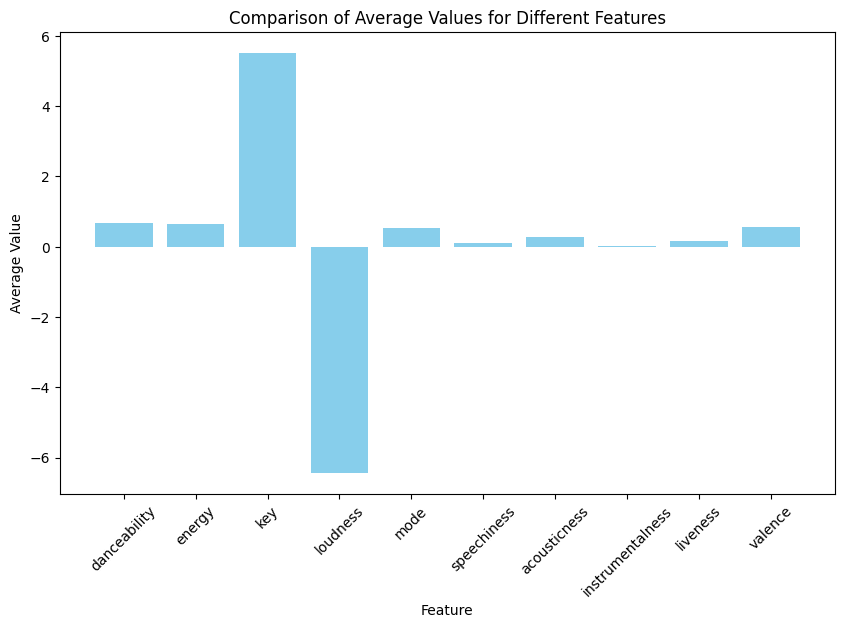

In [37]:
#Graph 1
plt.figure(figsize=(10, 6))
plt.bar(average_df['Feature'], average_df['Average Value'], color='skyblue')
plt.title('Comparison of Average Values for Different Features')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-202bb5178d37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')


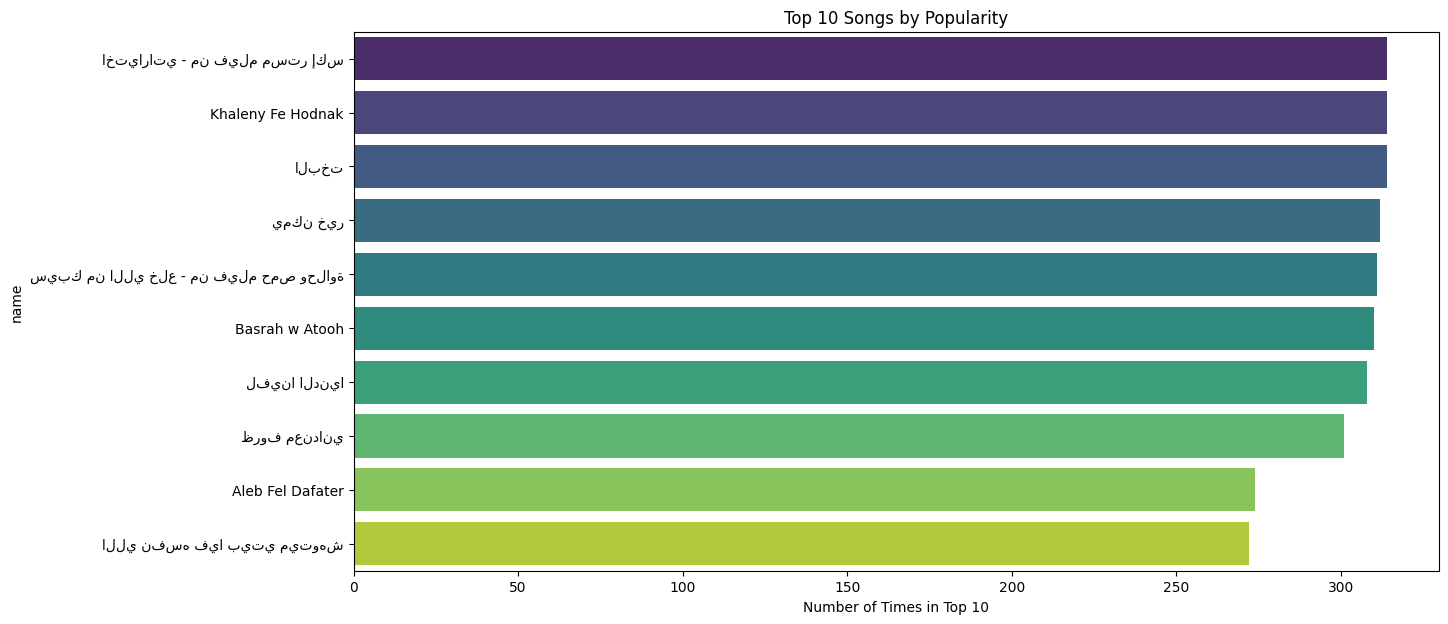

<ipython-input-38-202bb5178d37>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


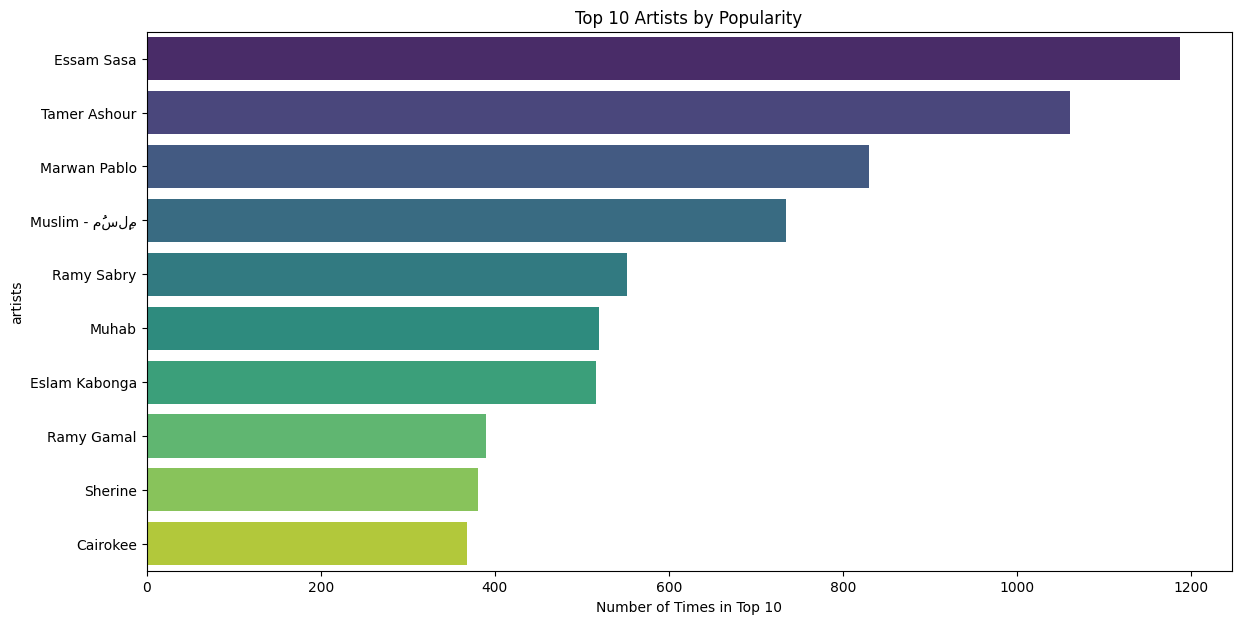

In [38]:
#Graph 2 #I have a problem with arabic chars on charts
plt.figure(figsize=(14, 7))
top_songs = df_city['name'].value_counts().head(10)
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')
plt.title('Top 10 Songs by Popularity')
plt.xlabel('Number of Times in Top 10')
plt.show()

plt.figure(figsize=(14, 7))
top_artists = df_city['artists'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Popularity')
plt.xlabel('Number of Times in Top 10')
plt.show()


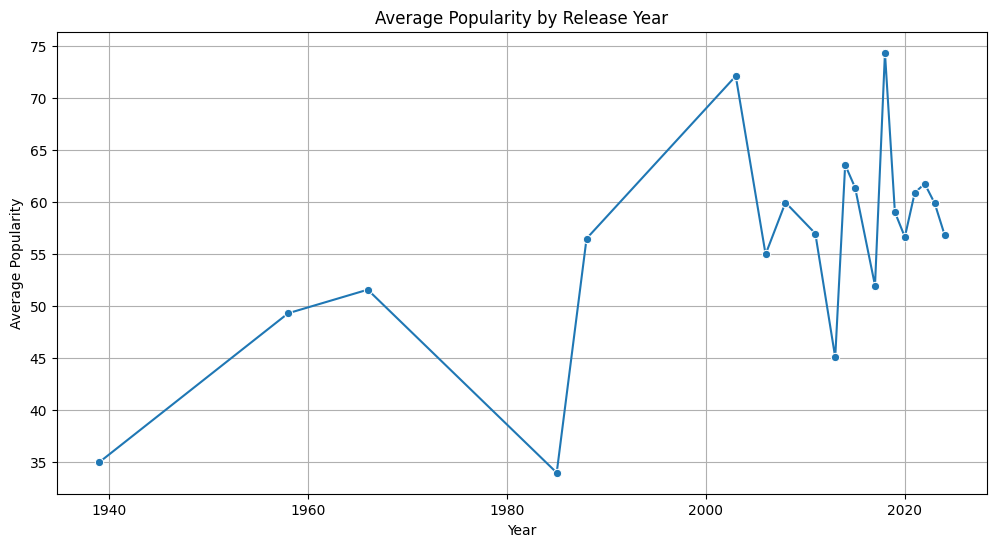

In [39]:
#Graph 3
plt.figure(figsize=(12, 6))
popularity_by_year = df_city.groupby('release_year')['popularity'].mean()
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker='o')
plt.title('Average Popularity by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

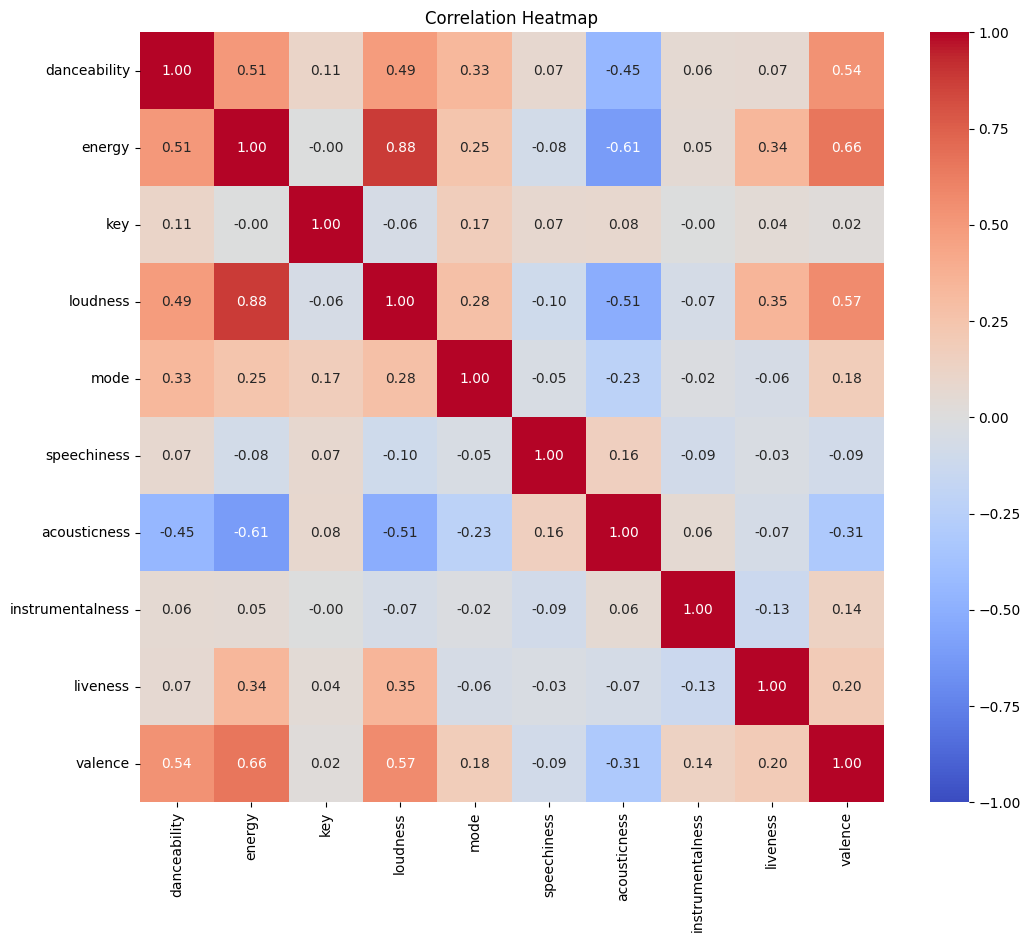

In [40]:
#Graph 4
plt.figure(figsize=(12, 10))
corr = df_city[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

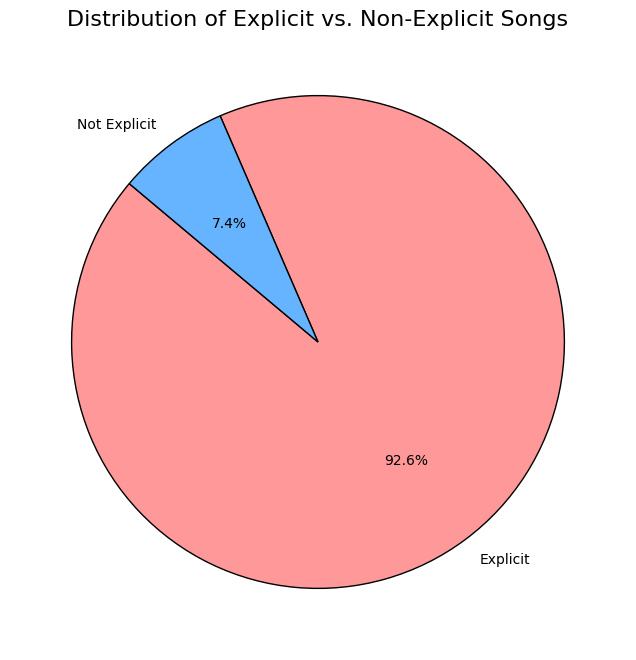

In [41]:
#Graph 5
explicit_counts = df_city['is_explicit'].value_counts()
labels = ['Explicit', 'Not Explicit']
sizes = explicit_counts
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Explicit vs. Non-Explicit Songs', fontsize=16)
plt.show()

**Streamlit Dashboard**

In [42]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [43]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [44]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.81.211.242


In [45]:
# run streamlit server in backgound
!streamlit run  app.py&>/content/logs.txt & npx localtunnel --port 8501

your url is: https://wet-ducks-share.loca.lt
^C
